In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

from deeptcn import GaussianDeepTCN, QuantileDeepTCN

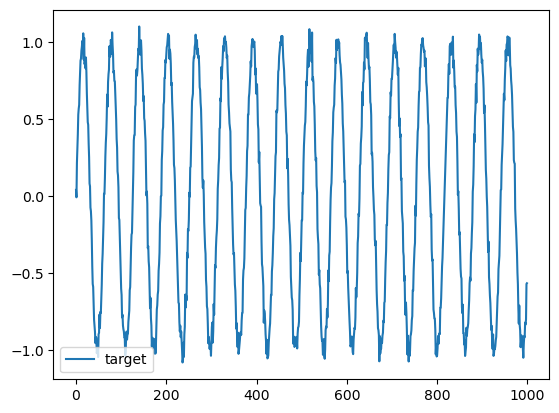

In [2]:
target = pd.DataFrame(
    np.sin(np.linspace(0, 100, 1000)) + np.random.randn(1000)*0.05, 
    columns=['target'],
)
target.plot();

In [3]:
input_len = 100 
output_len = 90

In [4]:
model = GaussianDeepTCN(
    input_len=input_len, 
    output_len=output_len,
    hidden_dim=32,
    num_layers=2,
    num_epochs=10,
    batch_size=16,
    dropout=0.,
    lr=0.001,
    verbose=True,
)
model.fit(target)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type      | Params
--------------------------------------
0 | encoder | TCNModule | 9.5 K 
1 | output  | Linear    | 66    
--------------------------------------
9.6 K     Trainable params
0         Non-trainable params
9.6 K     Total params
0.038     Total estimated model params size (MB)
/Users/vitaliypozdnyakov/miniconda3/envs/cordilleras/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training: |                                                     | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


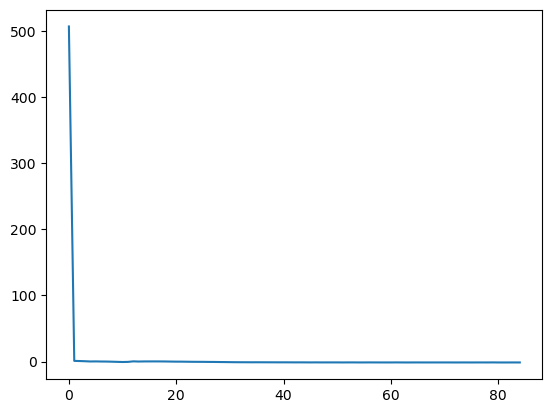

In [6]:
pd.read_csv('lightning_logs/version_76/metrics.csv').train_loss.plot();

In [7]:
past_target = target.iloc[100:100+input_len].values
pred = model.predict(past_target)
sample = model.sample(past_target)

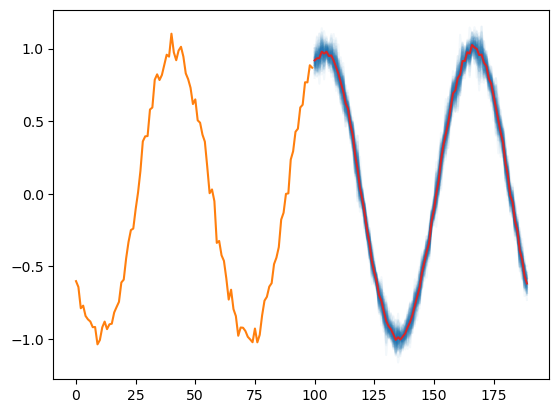

In [8]:
for sample_i in sample:
    plt.plot(np.arange(input_len, input_len+output_len), sample_i, c='tab:blue', alpha=0.05)
plt.plot(np.arange(input_len, input_len+output_len), pred, c='tab:red')
plt.plot(np.arange(input_len), past_target, c='tab:orange');

In [9]:
model = QuantileDeepTCN(
    input_len=input_len, 
    output_len=output_len,
    hidden_dim=32,
    num_layers=2,
    num_epochs=10,
    batch_size=16,
    dropout=0.,
    lr=0.001,
    verbose=True,
    quantiles=[0.01, 0.5, 0.99],
)
model.fit(target)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type      | Params
--------------------------------------
0 | encoder | TCNModule | 9.5 K 
1 | output  | Linear    | 99    
--------------------------------------
9.6 K     Trainable params
0         Non-trainable params
9.6 K     Total params
0.038     Total estimated model params size (MB)
/Users/vitaliypozdnyakov/miniconda3/envs/cordilleras/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training: |                                                     | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


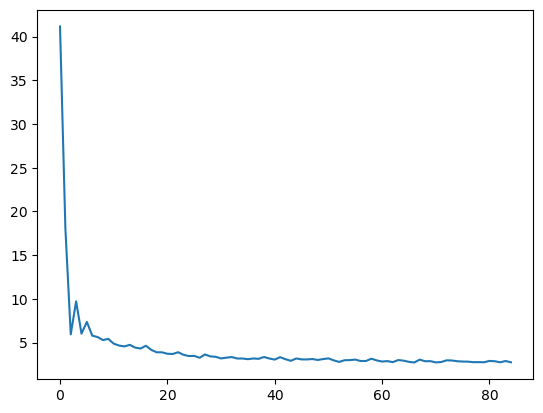

In [10]:
pd.read_csv('lightning_logs/version_77/metrics.csv').train_loss.plot();

In [11]:
past_target = target.iloc[100:100+input_len].values
future_target = target.iloc[100+input_len:100+input_len+output_len].values
pred = model.predict(past_target)

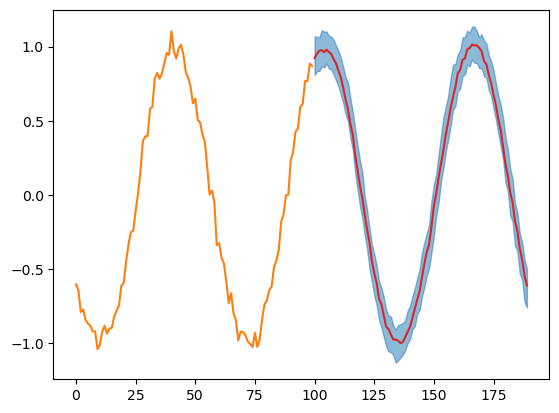

In [12]:
plt.plot(np.arange(input_len, input_len+output_len), pred[:, :, 1], c='tab:red')
plt.fill_between(
    x=np.arange(input_len, input_len+output_len), 
    y1=pred[:, 0, 0], y2=pred[:, 0, 2],
    alpha=0.5,
    color='tab:blue',
)
plt.plot(np.arange(input_len), past_target, c='tab:orange');